<a href="https://colab.research.google.com/github/sekoukeita/Exploratory-Data-Analysis-and-Visualisation-on-US-Road-Accidents/blob/master/Exploratory_Data_Analysis_of_Accidents_in_US_and_in_Cleveland_OHIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Roads Accidents in US and in the City of Cleveland Ohio.

In order to do this analysis, I get a public data from [Kaggle](https://www.kaggle.com/). This [data](https://www.kaggle.com/sobhanmoosavi/us-accidents) is a compilation of about 3 millions roads accidents records gathered from February 2016 to December 2019, from the 49 contiguous states of United States (Alaska and Haiti are not included).
Using Exploratory data analysis (data manipulation and visualization), I will first try to respond to some questions about accidents in the whole United states and then focus on my home city, Cleveland Ohio, to go a little deeper in the analysis.

# Part 1 : Accidents in the United States

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

In [0]:
# This cell has been automatically added by google colab to connect the  notebook with the google Drive account where the data is stored.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## What are the top 10 States in term of accidents

In [0]:
# Load the data.
df_accidents = pd.read_csv('/content/drive/My Drive/Data Science Projects/Accident_Analysis/US_Accidents_Dec19.csv')
df_accidents.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [0]:
# A serie with states abbr as labels and numbers of accidents as values.
accidents_per_state = df_accidents['State'].value_counts().sort_values(ascending=False)
accidents_per_state.head()

CA    663204
TX    298062
FL    223746
SC    146689
NC    142460
Name: State, dtype: int64

In [0]:
# Dictionary of US states and territories copied from internet to map the States' abbreviations with to get the state full names.
states_terrirories = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [0]:
# Create the DataFrame accidents per state.
df_accidents_per_state = pd.DataFrame({'State': accidents_per_state.index.map(states_terrirories), 
                                       'Abbr': accidents_per_state.index, 'Number Of Accidents': accidents_per_state.values})
# Add the column Percentage to the DataFrame.
df_accidents_per_state['Percentage'] = df_accidents_per_state['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents['ID'])*100))

In [0]:
# Display the top 10 States in term of accidents.
rank = np.arange(1,11)
df_top10_states = df_accidents_per_state.head(10).set_index(rank)
df_top10_states

,State,Abbr,Number Of Accidents,Percentage
1,California,CA,663204,22.30
2,Texas,TX,298062,10.02
3,Florida,FL,223746,07.52
4,South Carolina,SC,146689,04.93
5,North Carolina,NC,142460,04.79
6,New York,NY,137799,04.63
7,Pennsylvania,PA,90395,03.04
8,Michigan,MI,88694,02.98
9,Illinois,IL,86390,02.90
10,Georgia,GA,83620,02.81


In [0]:
rate_5_states = df_top10_states.head(5)['Number Of Accidents'].sum()/len(df_accidents['ID'])*100
print('Comment: Almost 50 % ({:05.2f} %) of all the US accidents occur in the top 5 states.'.format(rate_5_states))

Comment: Almost 50 % (49.56 %) of all the US accidents occur in the top 5 states.


## What are the top 10 cities in term of accidents?

In [0]:
# We can't use value_counts() for city like we did in the case of states.
# Cities name are not unique over the United States but seem to be unique by state.
# Let's use groupby state and city then create the DataFrame accidents per city.
df_city = df_accidents[['ID','State','City']]

In [0]:
# The groupby DataFrame
df_city = df_city.groupby(['State','City']).count()
df_city

ID
State City            
AL    Abbeville      6
      Adamsville     9
      Addison        4
      Alabaster    149
      Albertville   21
...                ...
WY    Torrington     4
      Wamsutter     24
      Wheatland     10
      Wilson         2
      Worland        1

[16884 rows x 1 columns]

In [0]:
# The method index.get_level_values(level) allows to get a serie from a multi-index according to the given level.
# Create the DataFrame accidents per city
df_accidents_per_city = pd.DataFrame({'City': df_city.index.get_level_values(1),'State': df_city.index.get_level_values(0).map(states_terrirories),
                                       'Number Of Accidents': df_city['ID']}).reset_index(drop=True)
df_accidents_per_city['Percentage'] = df_accidents_per_city['Number Of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(df_accidents['ID'])*100))

In [0]:
df_top10_cities = df_accidents_per_city.sort_values(by='Number Of Accidents',ascending=False).head(10).set_index(rank)
df_top10_cities

,City,State,Number Of Accidents,Percentage
1,Houston,Texas,93245,03.13
2,Charlotte,North Carolina,67917,02.28
3,Los Angeles,California,65851,02.21
4,Austin,Texas,58553,01.97
5,Dallas,Texas,57823,01.94
6,Raleigh,North Carolina,39623,01.33
7,Atlanta,Georgia,37576,01.26
8,Miami,Florida,31097,01.05
9,Oklahoma City,Oklahoma,30787,01.04
10,Baton Rouge,Louisiana,30232,01.02


In [0]:
houston = df_top10_cities.iloc[0,2] # first row: index = 0 , 3rd column: column = 2
pennsylvania = df_top10_states.loc[7,'Number Of Accidents'] # index label = 7, column label= 'Number of Accidents'

print('Comment: The top 1 city, Houston, has more accidents ({:,}) than the entire Pennsylvania state ({:,})\
 which is ranked 7th in the top 10 states.'.format(houston, pennsylvania))

Comment: The top 1 city, Houston, has more accidents (93,245) than the entire Pennsylvania state (90,395) which is ranked 7th in the top 10 states.


## Visualization of the top 10 States and Cities

Text(0, 0.5, 'Number of Accidents')

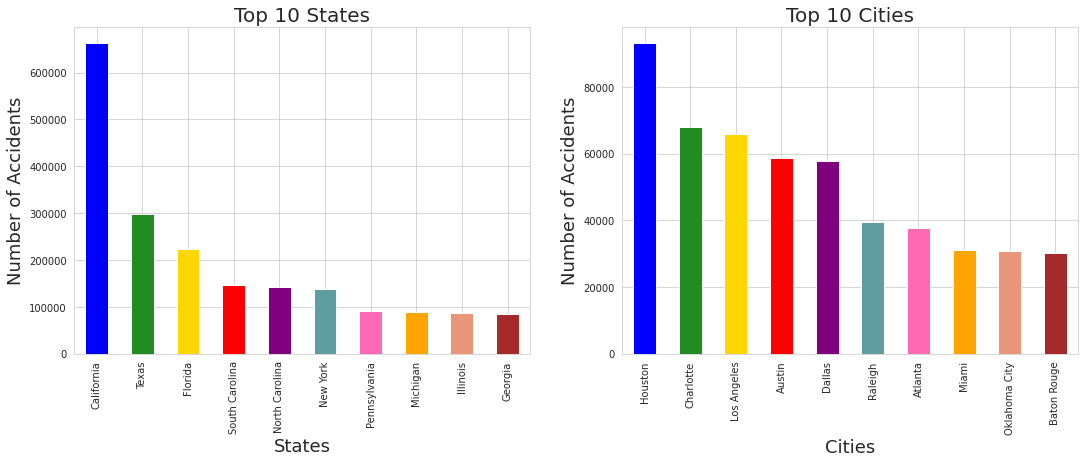

In [0]:
# Visualization of the 10 states and cities where accidents happen the most using pandas bult-in visualization

df_state = df_top10_states.set_index('State')
df_city = df_top10_cities.set_index('City')

fig,ax = plt.subplots(1,2,figsize=(18,6))
color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')

df_state['Number Of Accidents'].plot.bar(ax=ax[0],color=color)
ax[0].set_title("Top 10 States",size=20)
ax[0].set_xlabel('States',size=18)
ax[0].set_ylabel('Number of Accidents',size=18)

df_city['Number Of Accidents'].plot(kind='bar',ax=ax[1],color=color)
ax[1].set_title("Top 10 Cities",size=20)
ax[1].set_xlabel('Cities',size=18)
ax[1].set_ylabel('Number of Accidents',size=18)

In [0]:
print('Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.')

Comment: Although Texas is not the top 1 state in term of accidents, it has 3 cities (Houston, Austin and Dallas) in the top 5 cities.


## Interactive Visualization of Accidents Distribution over the entire United States

In [0]:
# Defining data variable
text = df_accidents_per_state.apply(lambda x: x['State'] + ': ' + str(x['Percentage']) + ' %',axis=1)
data = dict(type = 'choropleth',
           locations = df_accidents_per_state['Abbr'],
           locationmode = 'USA-states',
            reversescale = True,
           text = text,
           z = df_accidents_per_state['Number Of Accidents'], # the color vary according to z value.
           colorbar = {'title':'Number of Accidents'}
           )

# Defining layout variable
layout = dict(geo = dict(scope='usa', showlakes=False, lakecolor='rgb(85,173,240)'),
             title = 'Accidents from February 2016 to December 2019 Distribution in the United States.'
             )

In [0]:
# Displaying the interactive choropleth
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

## How accidents are distributed in term of severity and their occurrence moment (Day or Night)

Text(0, 0.5, 'Number of Accidents')

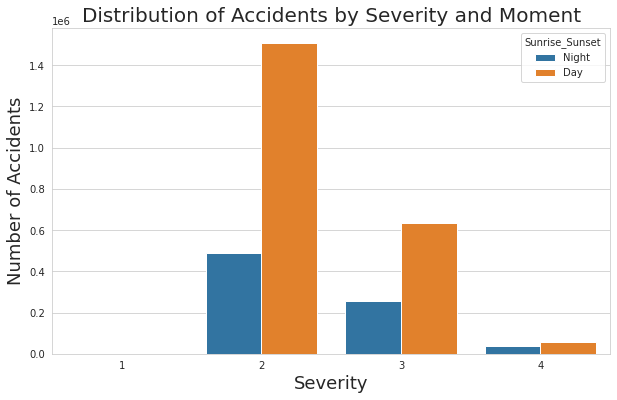

In [0]:
# Distribution of accidents according to their severity and when (Day/Night) they occur using Seaborn visualization.
plt.figure(figsize=(10,6))

sns.countplot(data=df_accidents,x='Severity', hue='Sunrise_Sunset',)
plt.title('Distribution of Accidents by Severity and Moment', size= 20)
plt.xlabel('Severity', size=18)
plt.ylabel('Number of Accidents', size=18)

In [0]:
print('Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity \
and no matter its severity, an accident likely occurs during the day than at night.')

Comment:The large majority of accidents has from the category 2 on a scale of 4 in term of severity and no matter its severity, an accident likely occurs during the day than at night.


# Part 2: Accidents in Cleveland Ohio

## How Cleveland Accidents are distributed per year, month, day and hour

In [0]:
# Let's convert the Start and End time columns that are in string format into date format and use them to get only accidents occurred
# between 1/1/2017 and 12/31/2018 and filter on State and City to get only accidents for the city of Cleveland.
from datetime import datetime

df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time'])
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time'])

df_accidents_cleveland = df_accidents[(df_accidents['State']=='OH') & (df_accidents['City']=='Cleveland')]
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
87,A-88,MapQuest,201.0,3,2016-02-11 05:32:29,2016-02-11 06:02:29,41.422199,-81.843018,NaN,NaN,0.01,Accident on I-480 Westbound at Exit 9 OH-17 Br...,NaN,Grayton Rd,R,Cleveland,Cuyahoga,OH,44135,US,US/Eastern,KCLE,2016-02-11 05:51:00,14.0,0.5,56.0,30.14,9.0,NW,11.5,0.0,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night
91,A-92,MapQuest,201.0,3,2016-02-11 06:29:00,2016-02-11 21:00:00,41.420818,-81.694008,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 16 OH-94 S...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44109,US,US/Eastern,KBKL,2016-02-11 06:53:00,17.1,-0.3,59.0,30.12,10.0,NW,21.9,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
96,A-97,MapQuest,201.0,3,2016-02-11 07:29:06,2016-02-11 08:18:10,41.355396,-81.819267,NaN,NaN,0.01,Accident on I-71 Northbound at Exit 234 US-42 ...,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-11 07:51:00,15.1,-1.6,51.0,30.18,10.0,NW,18.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
150,A-151,MapQuest,201.0,2,2016-02-15 07:37:49,2016-02-15 08:07:49,41.410461,-81.725853,NaN,NaN,0.00,Accident on Westlake Ave at Torrington Ave.,5847.0,Westlake Ave,L,Cleveland,Cuyahoga,OH,44129-2344,US,US/Eastern,KCLE,2016-02-15 07:51:00,21.0,9.3,85.0,30.10,4.0,SSE,11.5,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
235,A-236,MapQuest,201.0,2,2016-02-18 06:27:59,2016-02-18 06:57:59,41.414131,-81.632141,NaN,NaN,0.01,Accident on OH-17 Granger Rd at Canal Rd. Expe...,7998.0,Granger Rd,R,Cleveland,Cuyahoga,OH,44125-4827,US,US/Eastern,KBKL,2016-02-18 06:53:00,19.0,11.1,71.0,30.52,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


In [0]:
print('Comment: There are {:,} accidents that occurred in Cleveland Ohio between February 2016 and December 2019'.format(len(df_accidents_cleveland)))

Comment: There are 4,768 accidents that occurred in Cleveland Ohio between February 2016 and December 2019


In [0]:
# Let's add some new columns that will help us in hours, week days, months, and years analysis.

  # function to create dates on format 'Fri Mar 20th, 2020'
def myDate(d):
  if d.day in [1,21,31]:
    return d.strftime('%a %b %dst, %Y')
  elif d.day in [2,22]:
    return d.strftime('%a %b %dnd, %Y')
  elif d.day==3:
    return d.strftime('%a %b %drd, %Y')
  else:
    return d.strftime('%a %b %dth, %Y')

df_accidents_cleveland['Hour'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.hour)
df_accidents_cleveland['Weekday'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.dayofweek)
df_accidents_cleveland['Monthday'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.day)
df_accidents_cleveland['Month'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.month)
df_accidents_cleveland['Year'] = df_accidents_cleveland['Start_Time'].apply(lambda t: t.year)
df_accidents_cleveland['Date'] = df_accidents_cleveland['Start_Time'].apply(myDate)


In [0]:
df_accidents_cleveland.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month,Year,Date,Monthday
87,A-88,MapQuest,201.0,3,2016-02-11 05:32:29,2016-02-11 06:02:29,41.422199,-81.843018,NaN,NaN,0.01,Accident on I-480 Westbound at Exit 9 OH-17 Br...,NaN,Grayton Rd,R,Cleveland,Cuyahoga,OH,44135,US,US/Eastern,KCLE,2016-02-11 05:51:00,14.0,0.5,56.0,30.14,9.0,NW,11.5,0.0,Light Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,5,3,2,2016,"Thu Feb 11th, 2016",11
91,A-92,MapQuest,201.0,3,2016-02-11 06:29:00,2016-02-11 21:00:00,41.420818,-81.694008,NaN,NaN,0.01,Accident on I-480 Eastbound at Exit 16 OH-94 S...,NaN,I-480 E,R,Cleveland,Cuyahoga,OH,44109,US,US/Eastern,KBKL,2016-02-11 06:53:00,17.1,-0.3,59.0,30.12,10.0,NW,21.9,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,6,3,2,2016,"Thu Feb 11th, 2016",11
96,A-97,MapQuest,201.0,3,2016-02-11 07:29:06,2016-02-11 08:18:10,41.355396,-81.819267,NaN,NaN,0.01,Accident on I-71 Northbound at Exit 234 US-42 ...,NaN,I-71 S,R,Cleveland,Cuyahoga,OH,44130,US,US/Eastern,KCLE,2016-02-11 07:51:00,15.1,-1.6,51.0,30.18,10.0,NW,18.4,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,7,3,2,2016,"Thu Feb 11th, 2016",11
150,A-151,MapQuest,201.0,2,2016-02-15 07:37:49,2016-02-15 08:07:49,41.410461,-81.725853,NaN,NaN,0.00,Accident on Westlake Ave at Torrington Ave.,5847.0,Westlake Ave,L,Cleveland,Cuyahoga,OH,44129-2344,US,US/Eastern,KCLE,2016-02-15 07:51:00,21.0,9.3,85.0,30.10,4.0,SSE,11.5,0.0,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,7,0,2,2016,"Mon Feb 15th, 2016",15
235,A-236,MapQuest,201.0,2,2016-02-18 06:27:59,2016-02-18 06:57:59,41.414131,-81.632141,NaN,NaN,0.01,Accident on OH-17 Granger Rd at Canal Rd. Expe...,7998.0,Granger Rd,R,Cleveland,Cuyahoga,OH,44125-4827,US,US/Eastern,KBKL,2016-02-18 06:53:00,19.0,11.1,71.0,30.52,10.0,SE,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,6,3,2,2016,"Thu Feb 18th, 2016",18


### Accidents per Year

Text(0, 0.5, 'Number of Accidents')

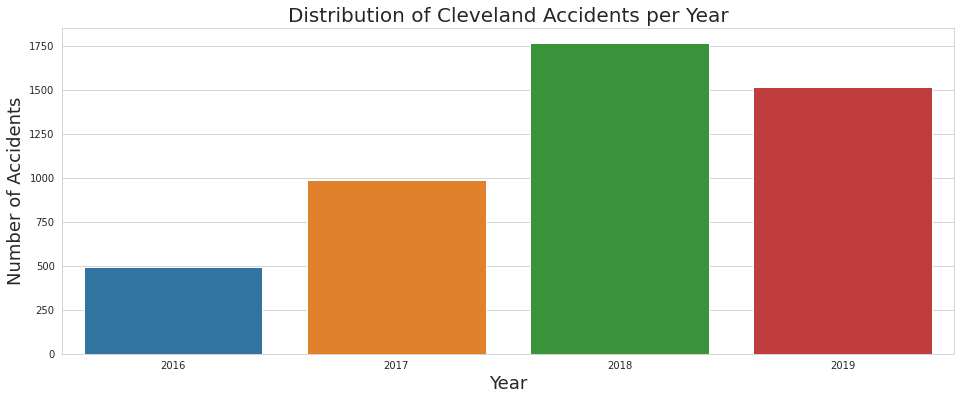

In [0]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Year')
plt.title('Distribution of Cleveland Accidents per Year', size= 20)
plt.xlabel('Year', size=18)
plt.ylabel('Number of Accidents', size=18)

In [0]:
print('Comment:The number of accidents has almost doubled from 2016 to 2017 then from 2017 to 2018 before decreasing from 2018 to 2019')

Comment:The number of accidents has almost doubled from 2016 to 2017 then from 2017 to 2018 before decreasing from 2018 to 2019


### Accidents per Month

Text(0, 0.5, 'Number of Accidents')

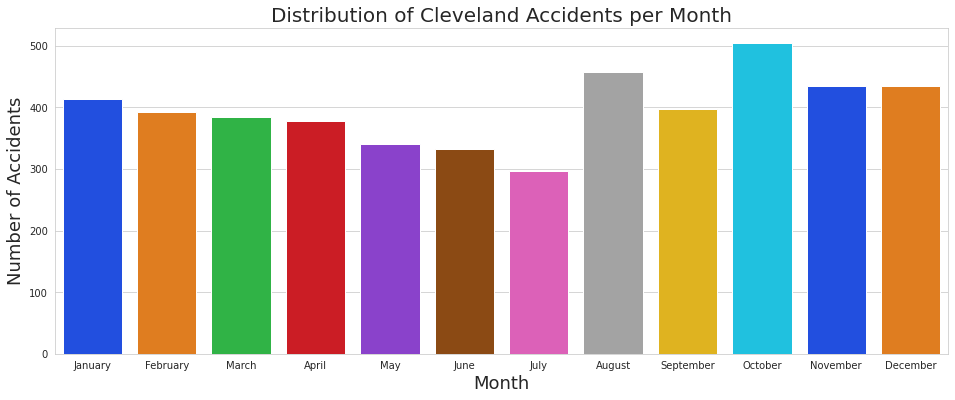

In [0]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Month',palette='bright')
plt.title('Distribution of Cleveland Accidents per Month', size= 20)
plt.xlabel('Month', size=18)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11],labels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.ylabel('Number of Accidents', size=18)

In [0]:
print('Comment: Most accidents happen in October, followed by August. July is the month with less accidents.')

Comment: Most accidents happen in October, followed by August. July is the month with less accidents.


In [0]:
# matrix
matrix_month = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Month',aggfunc='count')
  # Replace the column with month number by the whole month name.
matrix_month.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']

matrix_month

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,58.0,52.0,54.0,36.0,40.0,32.0,52.0,41.0,30.0,37.0,63.0
2017,71.0,71.0,67.0,40.0,57.0,37.0,35.0,152.0,136.0,122.0,77.0,125.0
2018,151.0,136.0,156.0,148.0,132.0,147.0,128.0,142.0,117.0,214.0,170.0,124.0
2019,192.0,128.0,110.0,135.0,116.0,109.0,102.0,111.0,104.0,138.0,151.0,122.0


Text(767.7272727272725, 0.5, 'Year')

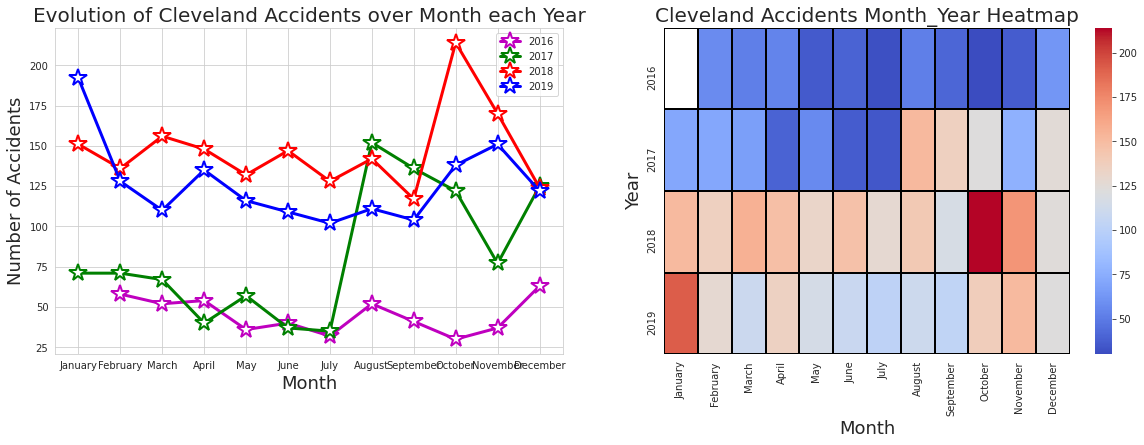

In [0]:
fig,ax = plt.subplots(1,2,figsize=(20,6))

# Evolution of Accidents over Months each year.
  # when a serie is plotted, the values are the y and indexes are the x
ax[0].plot(matrix_month.loc[2016],color='m',label='2016',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='m',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2017],color='g',label='2017',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='g',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2018],color='r',label='2018',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
ax[0].plot(matrix_month.loc[2019],color='b',label='2019',linewidth=3,
           linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax[0].legend(loc=0)
ax[0].set_title('Evolution of Cleveland Accidents over Month each Year', size= 20)
ax[0].set_xlabel('Month', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

# Heatmap
sns.heatmap(matrix_month,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1])
ax[1].set_title('Cleveland Accidents Month_Year Heatmap', size= 20)
ax[1].set_xlabel('Month', size=18)
ax[1].set_ylabel('Year', size=18)

In [0]:
print('Comment: October 2018 ({} accidents) and January 2019 ({} accidents) registered the most accidents\
\nwhile October 2016 ({} accidents) and July 2016 ({} accidents) registered the less'.format(int(matrix_month.loc[2018,'October']),
                                                                                              int(matrix_month.loc[2019,'January']),
                                                                                              int(matrix_month.loc[2016,'October']),
                                                                                              int(matrix_month.loc[2016,'July']))) 

Comment: October 2018 (214 accidents) and January 2019 (192 accidents) registered the most accidents
while October 2016 (30 accidents) and July 2016 (32 accidents) registered the less


In [0]:
# Evolution over months for the 4 years
years = ['2016','2017','2018','2019']

  # a df is created for each year with the number of accidents per month and then those df are concatenated on years
df_evolution = pd.concat([matrix_month.loc[[2016]].rename(index={2016:'Number of Accidents'}),
                         matrix_month.loc[[2017]].rename(index={2017:'Number of Accidents'}),
                        matrix_month.loc[[2018]].rename(index={2018:'Number of Accidents'}),
                        matrix_month.loc[[2019]].rename(index={2019:'Number of Accidents'})],
                         keys=years,axis=1)
df_evolution.index.name = 'Accidents'

df_evolution

2016                 ...    2019                  
                    January February March  ... October November December
Accidents                                   ...                          
Number of Accidents     NaN     58.0  52.0  ...   138.0    151.0    122.0

[1 rows x 48 columns]

In [0]:
years = ['2016','2017','2018','2019']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

# returns a list in the format J16, F16, ..., N19,D19 for January 2016, February 2016,...,November 2019, December 2019.
temp = []
for y in years:
  for m in months:
    temp.append(m[0]+y[2:])
    x_values= np.array(temp)

y_values = df_evolution.loc['Number of Accidents'].values # only the values of the serie that has a multi-level index.

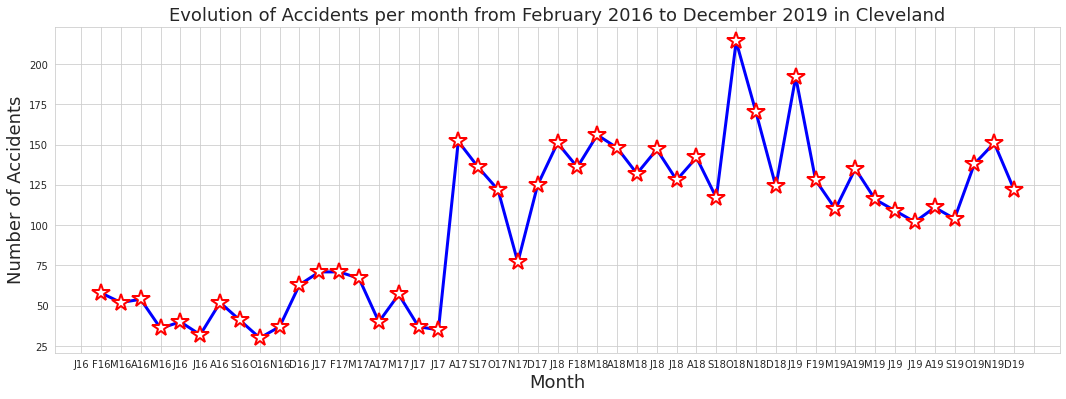

In [0]:
plt.figure(figsize=(18,6))

plt.plot(y_values,color='b',linewidth=3,linestyle='solid',marker='*',markersize=18, markerfacecolor='w',markeredgecolor='r',markeredgewidth='2')
  # The 48 month names replace the value 0 - 48 which are the original ticks.
plt.xticks(ticks=np.arange(0,49),labels=x_values); # the semi colon (;) at the end allows to hide the description output.
plt.title('Evolution of Accidents per month from February 2016 to December 2019 in Cleveland',size=18)
plt.xlabel('Month', size=18)
plt.ylabel('Number of Accidents', size=18)
matrix_month = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Month',aggfunc='count')

In [0]:
print('Comment: Since August 2017 when the number of accidents passed the threshold of 100 accidents per month, \
\nit has always been there except for the month of November 2017')

Comment: Since August 2017 when the number of accidents passed the threshold of 100 accidents per month, 
it has always been there except for the month of November 2017


### Accidents per Day

Text(0, 0.5, 'Number of Accidents')

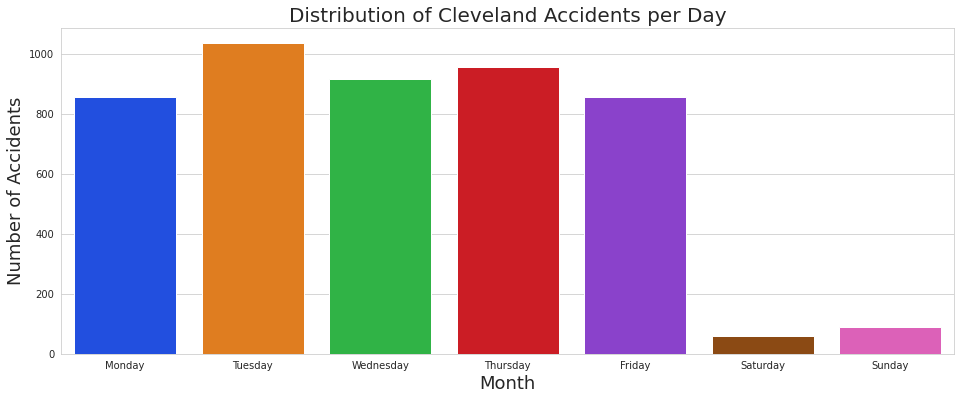

In [0]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Weekday',palette='bright')
plt.title('Distribution of Cleveland Accidents per Day', size= 20)
plt.xlabel('Month', size=18)
plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Number of Accidents', size=18)

In [0]:
print('Comment: Accidents occur less in weekend (Saturdays and sundays). They likely happen on Tuesdays.')

Comment: Accidents occur less in weekend (Saturdays and sundays). They likely happen on Tuesdays.


In [0]:
# Heatmap of accidents per day
matrix_day = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Weekday',aggfunc='count')
matrix_day.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

matrix_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2016,89,97,85,131,79,7,7
2017,162,216,174,216,187,16,19
2018,318,385,356,299,335,25,47
2019,287,337,302,308,256,11,17


Text(767.7272727272725, 0.5, 'Year')

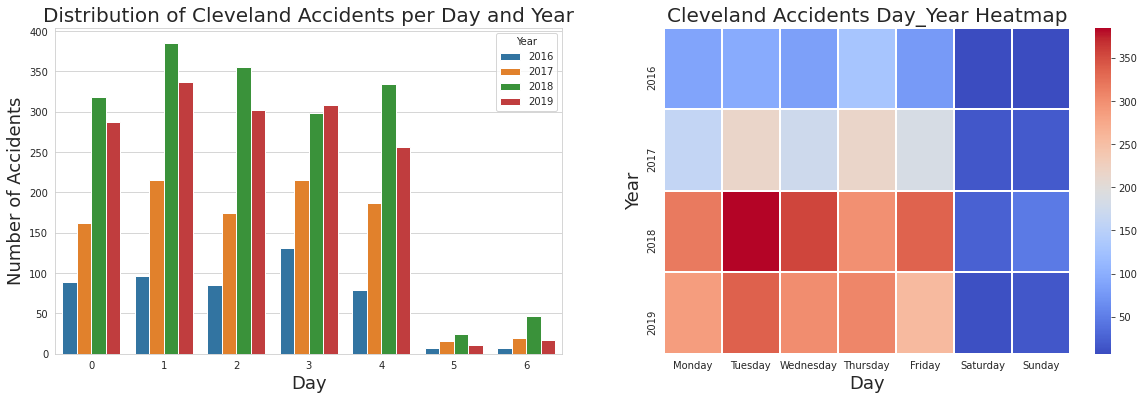

In [0]:
# Distribution of accidents over years and days using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.countplot(data=df_accidents_cleveland,x='Weekday',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Day and Year', size= 20)
ax[0].set_xlabel('Day', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_day,cmap='coolwarm',linewidth=1,linecolor='white',ax=ax[1])
ax[1].set_title('Cleveland Accidents Day_Year Heatmap', size= 20)
ax[1].set_xlabel('Day', size=18)
ax[1].set_ylabel('Year', size=18)

In [164]:
print('Comment: Except for the year 2016 when it was Thursday, Tuesday is the day when accidents likely happen.')

Comment: Except for the year 2016 when it was Thursday, Tuesday is the day when accidents likely happen.


In [165]:
# a serie giving the number of accidents that happen each day.
accidents_per_day = df_accidents_cleveland['Date'].value_counts()
accidents_per_day.head(5)

Fri Jan 12th, 2018    22
Thu Apr 05th, 2018    22
Wed Mar 06th, 2019    20
Fri Oct 12th, 2018    20
Tue Aug 21st, 2018    18
Name: Date, dtype: int64

In [168]:
# Create the DataFrame accidents per day.
df_accidents_per_day = pd.DataFrame({'Date': accidents_per_day.index,'Number of Accidents': accidents_per_day.values})

# Add the column Percentage to the DataFrame.
df_accidents_per_day['Percentage'] = df_accidents_per_day['Number of Accidents'].\
                                        apply(lambda x: '{:05.2f}'.format(x/len(accidents_per_day)*100))
                                        
# Display the top 10 Days that registered the most accidents.
rank = np.arange(1,11)
df_top10_days = df_accidents_per_day.head(10).set_index(rank)
df_top10_days

,Date,Number of Accidents,Percentage
1,"Fri Jan 12th, 2018",22,02.17
2,"Thu Apr 05th, 2018",22,02.17
3,"Wed Mar 06th, 2019",20,01.97
4,"Fri Oct 12th, 2018",20,01.97
5,"Tue Aug 21st, 2018",18,01.77
6,"Mon Dec 18th, 2017",18,01.77
7,"Mon Jul 09th, 2018",18,01.77
8,"Fri Sep 08th, 2017",18,01.77
9,"Thu Jan 24th, 2019",18,01.77
10,"Wed Mar 21st, 2018",18,01.77


Text(0, 0.5, 'Number of Accidents')

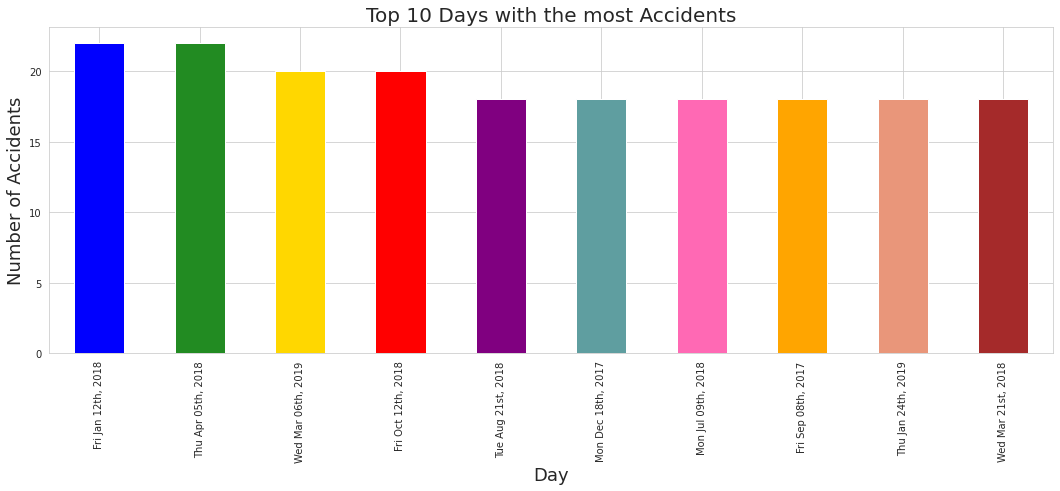

In [0]:
# Visualization of the 10 days when accidents happen the most using pandas bult-in visualization
plt.figure(figsize=(18,6))
df_days = df_top10_days.set_index('Date')

color = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')

df_days['Number of Accidents'].plot.bar(color=color)
plt.title("Top 10 Days with the most Accidents",size=20)
plt.xlabel('Day',size=18)
plt.ylabel('Number of Accidents',size=18)

In [0]:
total_days = len(accidents_per_day)
total_accidents = accidents_per_day.values.sum()
daily_average = total_accidents/total_days

print('While the daily average for accident is about {}, each day of the top ten days registers about 5 times the average.'.format(int(daily_average)))

While the daily average for accident is about 4, each day of the top ten days registers about 5 times the average.


### Accidents per Hour

Text(0, 0.5, 'Number of Accidents')

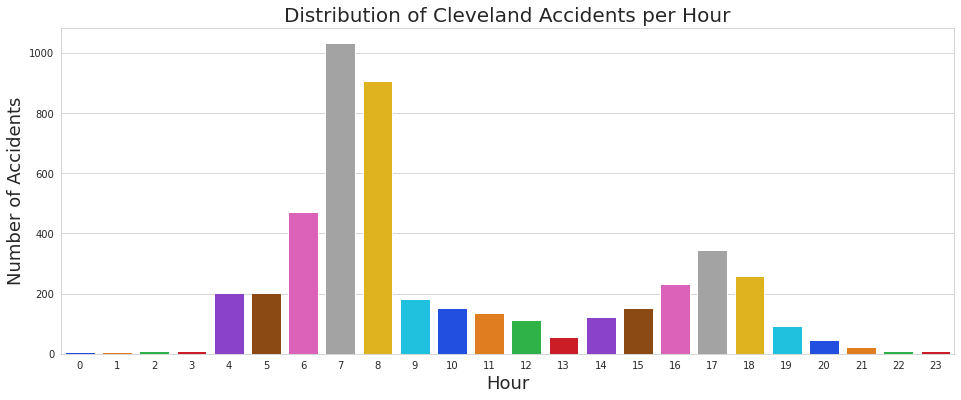

In [0]:
plt.figure(figsize=(16,6))

sns.countplot(data=df_accidents_cleveland,x='Hour',palette='bright')
plt.title('Distribution of Cleveland Accidents per Hour', size= 20)
plt.xlabel('Hour', size=18)
#plt.xticks(ticks=[0,1,2,3,4,5,6],labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Number of Accidents', size=18)

In [0]:
print('Comment: The large majority of accidents happen around 7 and 8 am.')

Comment: The large majority of accidents happen around 7 and 8 am.


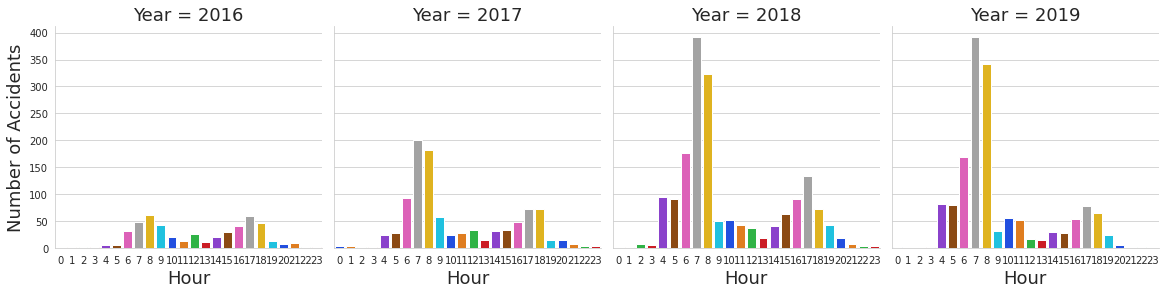

In [0]:
# Using seaborn catplot to display two charts side by side like the facetgrid
g= sns.catplot(data=df_accidents_cleveland,x='Hour',col='Year',kind='count',height=4, aspect=1,palette='bright')
g.set_titles(size=18)
g.set_xlabels(size=18)
g.set_ylabels('Number of Accidents',size=18)

In [0]:
print('Except 2016, the 3 other years show the same trends: Accidents mostly happen in the morning and occur around 7 and 8 am.\nSince we already saw that accidents mostly occur on week days,\
we can conclude that accident happen during morning rush hours when people are on their way to work.')

Except 2016, the 3 other years show the same trends: Accidents mostly happen in the morning and occur around 7 and 8 am.
Since we already saw that accidents mostly occur on week days,we can conclude that accident happen during morning rush hours when people are on their way to work.


In [0]:
# Heatmap of accidents per Hour
matrix_hour = pd.pivot_table(data=df_accidents_cleveland,values='ID',index=['Year'],columns='Hour',aggfunc='count')

matrix_hour

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Year,,,,,,,,,,,,,,,,,,,,,,,,
2016,NaN,2.0,1.0,2.0,5.0,6.0,32.0,48.0,61.0,43.0,20.0,13.0,25.0,11.0,20.0,30.0,40.0,59.0,46.0,13.0,7.0,8.0,1.0,2.0
2017,3.0,3.0,1.0,1.0,23.0,27.0,92.0,201.0,181.0,58.0,24.0,27.0,34.0,14.0,31.0,33.0,48.0,73.0,73.0,15.0,14.0,7.0,4.0,3.0
2018,NaN,1.0,7.0,6.0,94.0,90.0,177.0,392.0,324.0,49.0,52.0,43.0,36.0,18.0,41.0,62.0,91.0,134.0,73.0,43.0,19.0,7.0,3.0,3.0
2019,2.0,NaN,NaN,1.0,81.0,80.0,169.0,391.0,341.0,32.0,56.0,51.0,17.0,14.0,29.0,28.0,53.0,78.0,65.0,23.0,6.0,NaN,1.0,NaN


Text(767.7272727272725, 0.5, 'Year')

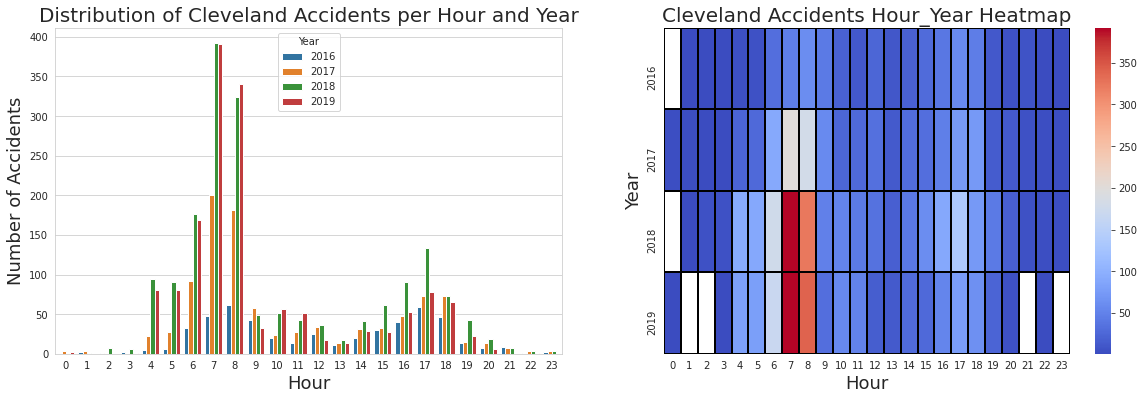

In [0]:
# Distribution of accidents per Hour using Seaborn visualization.
fig,ax = plt.subplots(1,2,figsize=(20,6))

sns.countplot(data=df_accidents_cleveland,x='Hour',hue='Year',ax=ax[0])
ax[0].set_title('Distribution of Cleveland Accidents per Hour and Year', size= 20)
ax[0].set_xlabel('Hour', size=18)
ax[0].set_ylabel('Number of Accidents', size=18)

sns.heatmap(matrix_hour,cmap='coolwarm',linewidth=1,linecolor='black',ax=ax[1])
ax[1].set_title('Cleveland Accidents Hour_Year Heatmap', size= 20)
ax[1].set_xlabel('Hour', size=18)
ax[1].set_ylabel('Year', size=18)

In [0]:
print('Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am for 2017, 2018 and 2019.')

Comment: The heatmap shows clearly that the accidents happen mostly around 7 and 8 am for 2017, 2018 and 2019.
